Purpose:
Import the mat files that Joe sent over and start looking at the data. 
Convert to real space (using Fourier Transform). 

Sample randomly and see if we can reconstruct with reduced measurements. 

# Import and preview data

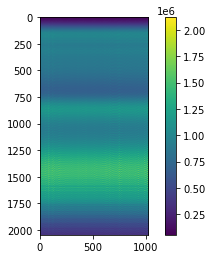

In [1]:
import scipy.io
from matplotlib import pyplot as plt

bscanspectramat = scipy.io.loadmat('data from joe/OCT_spectrum(1).mat')
bscanspectra = bscanspectramat['OCT_spectrum']
plt.figure()
plt.imshow(bscanspectra)
plt.colorbar()

Text(0, 0.5, 'Intensity (arb unit)')

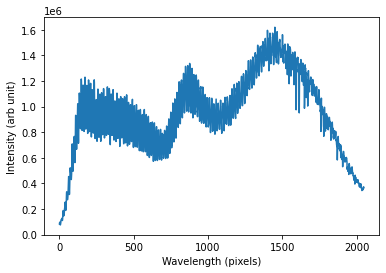

In [3]:
singlespec = bscanspectra[:,1]
plt.figure()
plt.plot(singlespec)
plt.xlabel('Wavelength (pixels)')
plt.ylabel('Intensity (arb unit)')

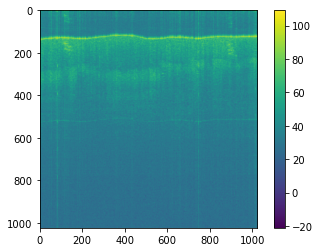

In [3]:
bscanspatialmat = scipy.io.loadmat('data from joe/OCT_Bscan(1).mat')
bscanspatial = bscanspatialmat['OCT_Bscan']
plt.figure()
plt.imshow(bscanspatial)
plt.colorbar()

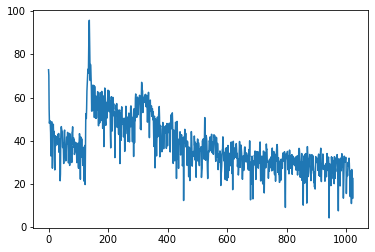

In [4]:
aline = bscanspatial[:,1]
plt.figure()
plt.plot(aline)

# Process spectra to get spatial

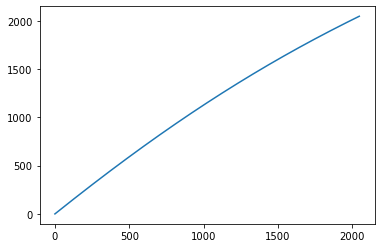

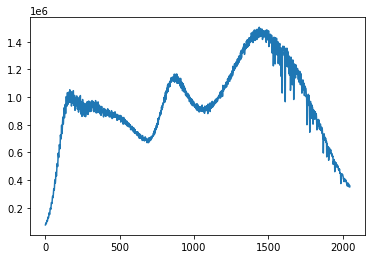

In [55]:
#import chirp and apodization spectrum (store in sim directory)

calvectors = scipy.io.loadmat('data from joe/chirp_apodization.mat')
apodspec = calvectors['ApodizationSpectrum']
chirp = calvectors['Chirp']
plt.figure()
plt.plot(chirp)
plt.figure()
plt.plot(apodspec)

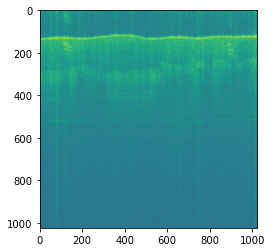

In [95]:
from scipy import interpolate

(k1,k2) = bscanspectra.shape

bscanspatialest = np.zeros((int(k1/2),k2))

for k in np.arange(k2):
    singlespecProc = bscanspectra[:,k] - np.squeeze(apodspec) #remove the source intensity
    
    f = interpolate.interp1d(np.squeeze(chirp), singlespecProc) #linearize using chirp
    xq = np.arange(k1)
    singlespecProc2 = f(xq)
    
    hann = np.hanning(k1)# hanning window
    singlespecProc3 = singlespecProc2*hann

    spatscat = abs(np.fft.fftshift(np.fft.fft(singlespecProc3))[int(k1/2-1):-1]) #fft
    spatscat = spatscat/(k1/2) #normalize
    spatscatlog = 20*np.log10(spatscat) #log scale
    bscanspatialest[:,k] = spatscatlog #store

plt.figure()
plt.imshow(bscanspatialest)